In [1]:
# Import packages needed for the notebook
import pandas as pd
import numpy as np
import csv
import os
import datetime as dt
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print('Import Complete')

#Create directory for graph save:
mydir = 'Car_Accident_Charts'
if not os.path.isdir(mydir):
    os.mkdir(mydir)
print('Directory Creation Complete')

Import Complete
Directory Creation Complete


In [5]:

#Upload sample data for analysis.
df1 = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')


In [6]:
df = df1.copy()

In [7]:

#Obtain basic statistics about the data set
data_info  = 'The following are the descriptive stats of the dataframe: \n'
data_info += '\t Data Shape: ' + str(df.shape) + '\n'
data_info += '\n'
data_info += '\t Data columns: ' + str(df.columns) + '\n'
data_info += '\n'
data_info += '\t Descriptive Statistics: ' + str(df.describe) + '\n'
data_info += '\n'
data_info += '\t Data Types: ' + str(df.dtypes) + '\n'
print(data_info)

The following are the descriptive stats of the dataframe: 
	 Data Shape: (194673, 38)

	 Data columns: Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

	 Descriptive Statistics: <bound method NDFrame.describe of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  

In [8]:
# View the first 3 rows of the data frame
df[:3]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [79]:

#Reduce the data frame to the intended columns for use in analysis
col = ['SEVERITYCODE', 'INCDTTM','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
        'WEATHER', 'ROADCOND', 'LIGHTCOND','JUNCTIONTYPE']
accidents = df[col]
accidents[:5]

,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE
0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight,At Intersection (intersection related)
1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection)
2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight,Mid-Block (not related to intersection)
3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight,Mid-Block (not related to intersection)
4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight,At Intersection (intersection related)


In [80]:

# Check for invalid values, such as Null or NaNs. 
accidents[col].isnull().sum()

SEVERITYCODE       0
INCDTTM            0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
JUNCTIONTYPE    6329
dtype: int64

In [81]:
# Drop the rows that have null or NaN values. Then, reset the indexes
accidents = accidents.dropna()
accidents = accidents.reset_index()
accidents

,index,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE
0,0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight,At Intersection (intersection related)
1,1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection)
2,2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight,Mid-Block (not related to intersection)
3,3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight,Mid-Block (not related to intersection)
4,4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight,At Intersection (intersection related)
...,...,...,...,...,...,...,...,...,...,...,...
183191,194668,2,11/12/2018 8:12:00 AM,3,0,0,2,Clear,Dry,Daylight,Mid-Block (not related to intersection)
183192,194669,1,12/18/2018 9:14:00 AM,2,0,0,2,Raining,Wet,Daylight,Mid-Block (not related to intersection)
183193,194670,2,1/19/2019 9:25:00 AM,3,0,0,2,Clear,Dry,Daylight,At Intersection (intersection related)
183194,194671,2,1/15/2019 4:48:00 PM,2,0,1,1,Clear,Dry,Dusk,At Intersection (intersection related)


In [82]:

def create_barh_plot(df, title, save, color):
    plt.figure(figsize=(15,7))
    ax = df.plot(kind='barh', color = color )
    plt.xlabel('Counts')
    plt.ylabel('Types')
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    graph_title = title
    plt.title(graph_title, fontsize = 20, fontweight = 'bold')
    graph_title_for_save = save
    plt.savefig('Car_Accident_Charts/'+ graph_title_for_save + '.png')
    plt.show()

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


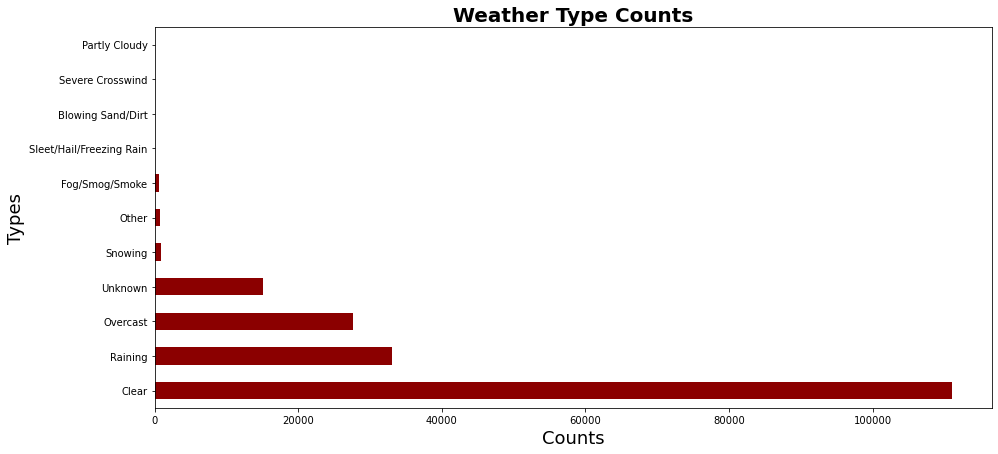

In [13]:
weather = accidents.WEATHER.value_counts()
print(weather)
create_barh_plot(weather, 'Weather Type Counts', 'weather_counts', 'darkred')

Mid-Block (not related to intersection)              86856
At Intersection (intersection related)               61241
Mid-Block (but intersection related)                 22353
Driveway Junction                                    10520
At Intersection (but not related to intersection)     2057
Ramp Junction                                          162
Unknown                                                  7
Name: JUNCTIONTYPE, dtype: int64


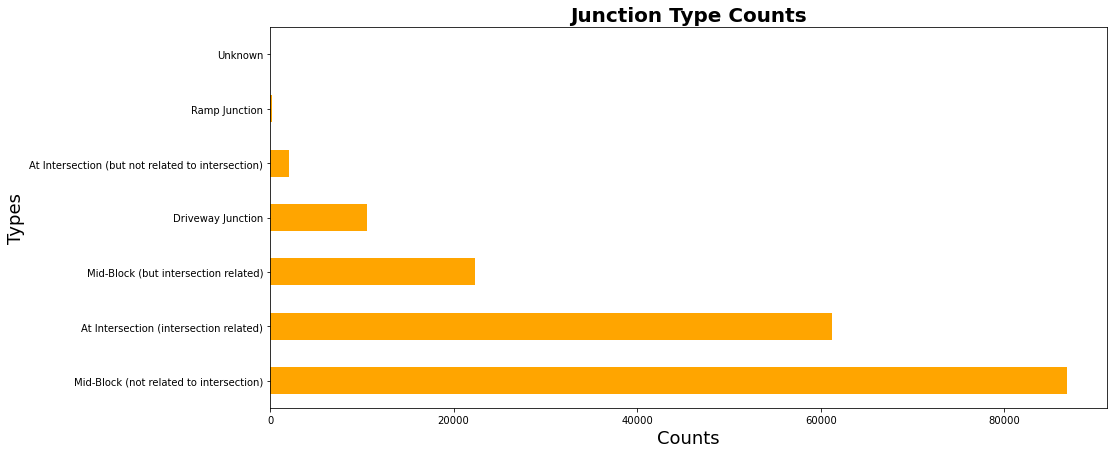

In [51]:
JUNCTIONTYPE = accidents.JUNCTIONTYPE.value_counts()
print(JUNCTIONTYPE)
create_barh_plot(JUNCTIONTYPE, 'Junction Type Counts', 'Junction_counts', 'orange')

Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64


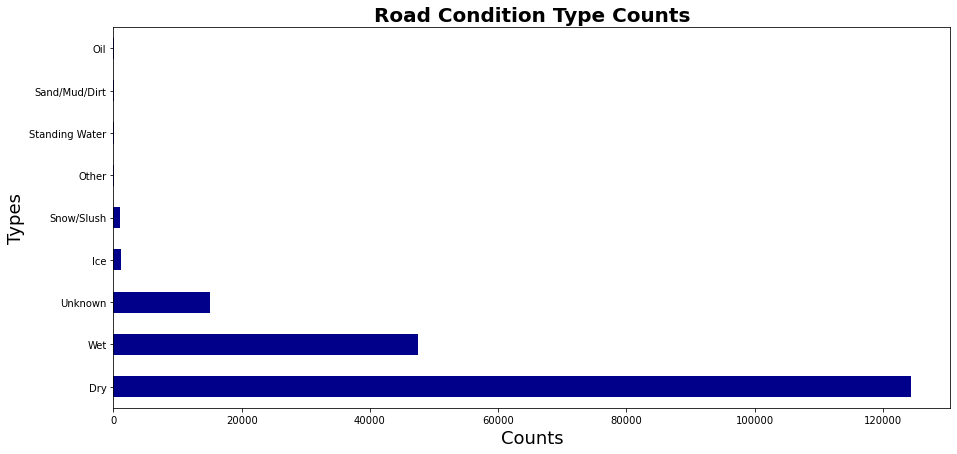

In [14]:
roadcond = accidents.ROADCOND.value_counts()
print(roadcond)
create_barh_plot(roadcond, 'Road Condition Type Counts', 'roadcond_counts', 'darkblue')

Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


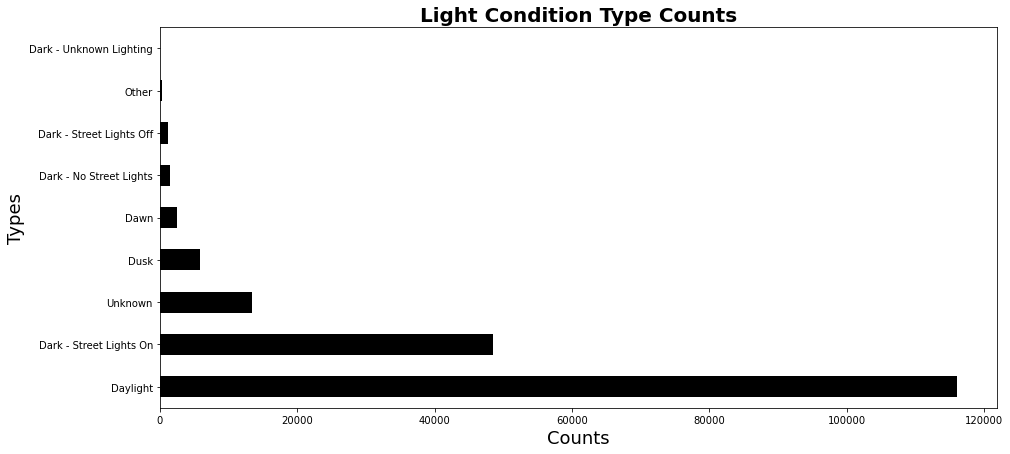

In [15]:
lightcond = accidents.LIGHTCOND.value_counts()
print(lightcond)
create_barh_plot(lightcond, 'Light Condition Type Counts', 'lightcond_counts', 'black')

In [53]:
#Change INCDTTM to datetime format for extraction of year and month for new columns. 
accidents['INCDTTM_dt'] = pd.to_datetime(accidents.INCDTTM)
accidents['INCDTTM_year'] = accidents.INCDTTM_dt.dt.year
accidents['INCDTTM_month'] = accidents.INCDTTM_dt.dt.month
accidents['INCDTTM_year_str'] = accidents.INCDTTM_year.astype(str)
accidents['INCDTTM_month_str'] = accidents.INCDTTM_month.astype(str)
accidents['INCDTTM_year_month'] = accidents[['INCDTTM_year_str','INCDTTM_month_str']].apply(lambda x: '-'.join(x),axis=1)

In [58]:
#Convert all column's object values to integers. 
weather_dict = {'Overcast':1, 'Raining':2, 'Clear':3, 'Other':4, 'Snowing':5,
               'Fog/Smog/Smoke':6, 'Sleet/Hail/Freezing Rain':7, 'Blowing Sand/Dirt':8,
               'Severe Crosswind':9, 'Partly Cloudy':10}
accidents['WEATHER_int'] = accidents.WEATHER.apply(lambda x: weather_dict.get(x)).fillna(0).astype(int)

JUNCTIONTYPE_dict = {'Unknown':6, 'Ramp Junction':5, 'At Intersection (but not related to intersection)':4, 'Driveway Junction':3, 'Mid-Block (but intersection related)':2,
               'At Intersection (intersection related)':1,} 
accidents['JUNCTIONTYPE_int'] = accidents.JUNCTIONTYPE.apply(lambda x: JUNCTIONTYPE_dict.get(x)).fillna(0).astype(int)

roadcond_dict = {'Wet':1, 'Dry':2, 'Unknown':3, 'Snow/Slush':4, 'Ice':5, 'Other':6,
                'Sand/Mud/Dirt':7, 'Standing Water':8, 'Oil':9}
accidents['ROADCOND_int'] = accidents.ROADCOND.apply(lambda x: roadcond_dict.get(x)).fillna(0).astype(int)

light_dict = {'Daylight':1, 'Dark - Street Lights On':2, 'Dark - No Street Lights':3,
             'Unknown':4, 'Dusk':5, 'Dawn':6, 'Dark - Street Lights Off':7,
             'Other':8, 'Dark - Unknown Lighting':9}
accidents['LIGHTCOND_int'] = accidents.LIGHTCOND.apply(lambda x: light_dict.get(x)).fillna(0).astype(int)

#Assign seasons to weather in Seattle, as the seasonality may have an impact on the predictability of accident serverity. 
seattle_seasons = {12:'Winter', 1:'Winter', 2:'Winter',3:'Spring',4:'Spring',5:'Spring', 6:'Summer',7:'Summer', 8:'Summer',9:'Fall',10:'Fall',11:'Fall'}
accidents['SEATTLE_SEASONS'] = accidents.INCDTTM_month .apply(lambda x: seattle_seasons.get(x))

#View the first 5 rows
accidents[:5]

,index,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,INCDTTM_dt,INCDTTM_year,INCDTTM_month,INCDTTM_year_str,INCDTTM_month_str,INCDTTM_year_month,WEATHER_int,JUNCTIONTYPE_int,ROADCOND_int,LIGHTCOND_int,SEATTLE_SEASONS
0,0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight,At Intersection (intersection related),2013-03-27 14:54:00,2013,3,2013,3,2013-3,1,1,1,1,Spring
1,1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection),2006-12-20 18:55:00,2006,12,2006,12,2006-12,2,0,1,2,Winter
2,2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight,Mid-Block (not related to intersection),2004-11-18 10:20:00,2004,11,2004,11,2004-11,1,0,2,1,Fall
3,3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight,Mid-Block (not related to intersection),2013-03-29 09:26:00,2013,3,2013,3,2013-3,3,0,2,1,Spring
4,4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight,At Intersection (intersection related),2004-01-28 08:04:00,2004,1,2004,1,2004-1,2,1,1,1,Winter


In [59]:

#Create new dataframe to create a correlation heatmap of the different variables for prediction.
int_cols = ['SEVERITYCODE','INCDTTM_dt', 'INCDTTM_year', 'INCDTTM_month', 'INCDTTM_year_str',
       'INCDTTM_month_str', 'INCDTTM_year_month','WEATHER_int','JUNCTIONTYPE_int', 'ROADCOND_int', 'LIGHTCOND_int', 'SEATTLE_SEASONS']
severity = accidents[int_cols]
severity[:5]

,SEVERITYCODE,INCDTTM_dt,INCDTTM_year,INCDTTM_month,INCDTTM_year_str,INCDTTM_month_str,INCDTTM_year_month,WEATHER_int,JUNCTIONTYPE_int,ROADCOND_int,LIGHTCOND_int,SEATTLE_SEASONS
0,2,2013-03-27 14:54:00,2013,3,2013,3,2013-3,1,1,1,1,Spring
1,1,2006-12-20 18:55:00,2006,12,2006,12,2006-12,2,0,1,2,Winter
2,1,2004-11-18 10:20:00,2004,11,2004,11,2004-11,1,0,2,1,Fall
3,1,2013-03-29 09:26:00,2013,3,2013,3,2013-3,3,0,2,1,Spring
4,2,2004-01-28 08:04:00,2004,1,2004,1,2004-1,2,1,1,1,Winter


In [60]:
seasons  = severity.groupby(['SEATTLE_SEASONS'])['INCDTTM_year'].sum()
seasons

SEATTLE_SEASONS
Fall      95556412
Spring    92719521
Summer    93267356
Winter    86854676
Name: INCDTTM_year, dtype: int64

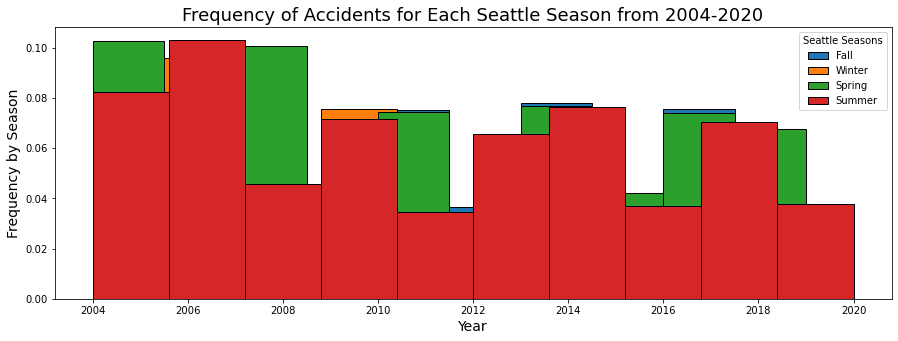

In [61]:

#Plot these values in a histogram
plt.figure(figsize=(15,5))
colors = ['red', 'green', 'blue', 'grey']
# seasons_df.hist(density = True, histtype = 'bar')
severity.groupby(['SEATTLE_SEASONS'])['INCDTTM_year'].hist(density = True, histtype = 'barstacked', ec='black')
plt.grid(False)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Frequency by Season', fontsize = 14)
plt.title('Frequency of Accidents for Each Seattle Season from 2004-2020', fontsize = 18)
plt.legend(['Fall', 'Winter', 'Spring', 'Summer'], title = 'Seattle Seasons')
graph_title_save = 'season_hist'
plt.savefig('Car_Accident_Charts/' + graph_title_save + '.png')
plt.show()

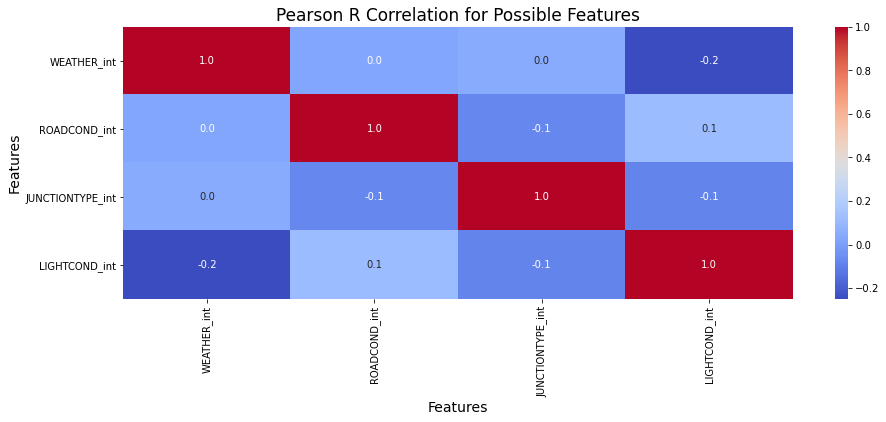

In [62]:
severity_corr = severity[['WEATHER_int', 'ROADCOND_int','JUNCTIONTYPE_int', 'LIGHTCOND_int']].corr()
ax = sns.heatmap(severity_corr, cmap='coolwarm', annot=True, fmt='.1f')
ax.figure.set_size_inches(15,5)
plt.xlabel('Features')
plt.ylabel('Features')
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)
graph_title = 'Pearson R Correlation for Possible Features'
plt.title(graph_title, fontsize = 17)
graph_title_save = 'corr_heatmap'
plt.savefig('Car_Accident_Charts/' + graph_title_save + '.png')
plt.show()

In [63]:

X = accidents[['WEATHER_int', 'ROADCOND_int','JUNCTIONTYPE_int', 'LIGHTCOND_int']].values
X[0:5]

array([[1, 1, 1, 1],
       [2, 1, 0, 2],
       [1, 2, 0, 1],
       [3, 2, 0, 1],
       [2, 1, 1, 1]])

In [64]:
y = accidents[['SEVERITYCODE']].values
y[0:5]

array([[2],
       [1],
       [1],
       [1],
       [2]])

In [65]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score,jaccard_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
shift_ml = 'ML for Shift \n'
shift_ml += '\t X_train: ' + str(X_train.shape[0]) + '\n'
shift_ml += '\t y_train: ' + str(y_train.shape[0]) + '\n'
shift_ml += '\t X_test: ' + str(X_test.shape[0]) + '\n'
shift_ml += '\t y_test: ' + str(y_test.shape[0]) + '\n'
print(shift_ml)

ML for Shift 
	 X_train: 146556
	 y_train: 146556
	 X_test: 36640
	 y_test: 36640



In [66]:

def heatmap_for_confusion(df):
    fix,ax = plt.subplots(figsize = (15, 7))
    sns.heatmap(df, annot = True, fmt = 'd', cmap= 'Reds')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    graph_title = 'Heatmap for Confusion Matrix for Machine Learning Algorithms' 
    plt.show()

DecisionTreeClassifier()
[[25230   100]
 [11257    53]]
              precision    recall  f1-score   support

           1       0.69      1.00      0.82     25330
           2       0.35      0.00      0.01     11310

    accuracy                           0.69     36640
   macro avg       0.52      0.50      0.41     36640
weighted avg       0.58      0.69      0.57     36640



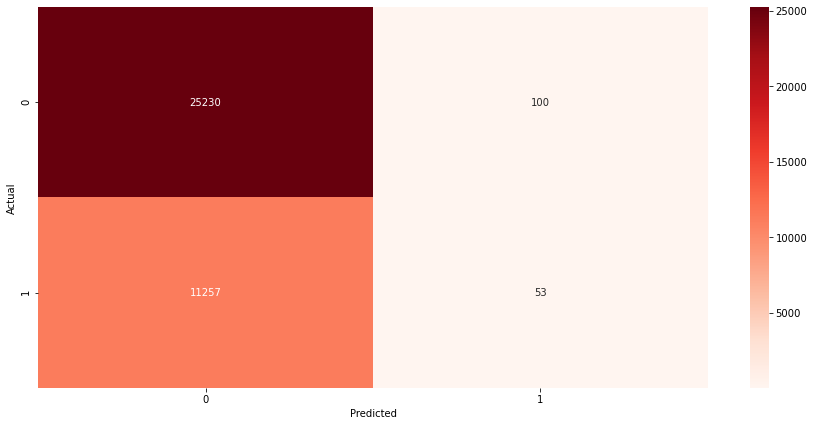

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print(model)

model.fit(X_train, y_train)
y_pred_DecisionTree = model.predict(X_test)

conf_mat_DecisionTree = confusion_matrix(y_test, y_pred_DecisionTree)
print(conf_mat_DecisionTree)

class_report = classification_report(y_test, y_pred_DecisionTree)
print(class_report)
heatmap_for_confusion(conf_mat_DecisionTree)

KNeighborsClassifier()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[2 1 1 2 1]
              precision    recall  f1-score   support

           1       0.70      0.83      0.76     25330
           2       0.34      0.20      0.25     11310

    accuracy                           0.64     36640
   macro avg       0.52      0.52      0.51     36640
weighted avg       0.59      0.64      0.60     36640



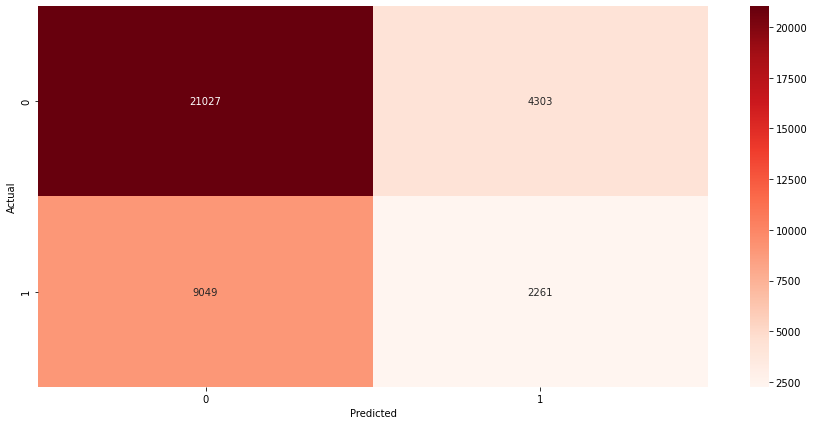

In [70]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN(n_neighbors = 5)
print(model)

model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
print(y_pred_knn[:5])

conf_mat = confusion_matrix(y_test, y_pred_knn)

class_report = classification_report(y_test, y_pred_knn)
print(class_report)
heatmap_for_confusion(conf_mat)

LogisticRegression()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           1       0.69      1.00      0.82     25330
           2       0.33      0.00      0.01     11310

    accuracy                           0.69     36640
   macro avg       0.51      0.50      0.41     36640
weighted avg       0.58      0.69      0.57     36640



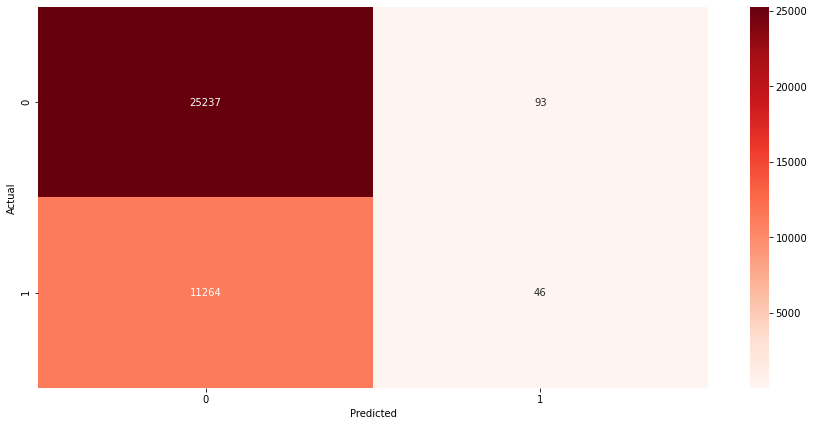

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print(model)
model.fit(X_train, y_train)
y_pred_logReg = model.predict(X_test)
# print(y_pred_logReg)

conf_mat_logReg = confusion_matrix(y_test, y_pred_logReg)
class_report = classification_report(y_test, y_pred_logReg)
print(class_report)

heatmap_for_confusion(conf_mat_logReg)

In [72]:

#This block of code will provide the Jaccard and F1 Scores for each algorithm's performance
ml_output_scores = 'Jaccard and F1 Scores \n'
ml_output_scores += '\t Decision Trees Scores: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, y_pred_DecisionTree, average='weighted'))+ '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_score(y_test, y_pred_DecisionTree))+ '\n'
ml_output_scores += '\n'
ml_output_scores += '\t KNN Scores: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, y_pred_knn, average='weighted')) + '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_score(y_test, y_pred_knn)) +'\n'
ml_output_scores += '\n'
ml_output_scores += '\t Logistic Regression Scores: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, y_pred_logReg, average='weighted')) + '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_score(y_test, y_pred_logReg))+ '\n'
ml_output_scores += '\n'
print(ml_output_scores)

Jaccard and F1 Scores 
	 Decision Trees Scores: 
		 f1 score: 0.5671660881786166
		 jaccard score: 0.6895891983491405

	 KNN Scores: 
		 f1 score: 0.6028168550592031
		 jaccard score: 0.6116233747345763

	 Logistic Regression Scores: 
		 f1 score: 0.5668208793614615
		 jaccard score: 0.6896485762693337




In [73]:
#Lets see how the models performed
from sklearn.model_selection import cross_validate, cross_val_score

models = [
          KNN(),
          LogisticRegression(),
          DecisionTreeClassifier()
]
CV=5
cv_df = pd.DataFrame(index = range(CV*len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_se

In [39]:
#Review the average accuracy across Decision Tree, KNN, and Logistic Regression
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.698437
KNeighborsClassifier      0.685582
LogisticRegression        0.697983
Name: accuracy, dtype: float64

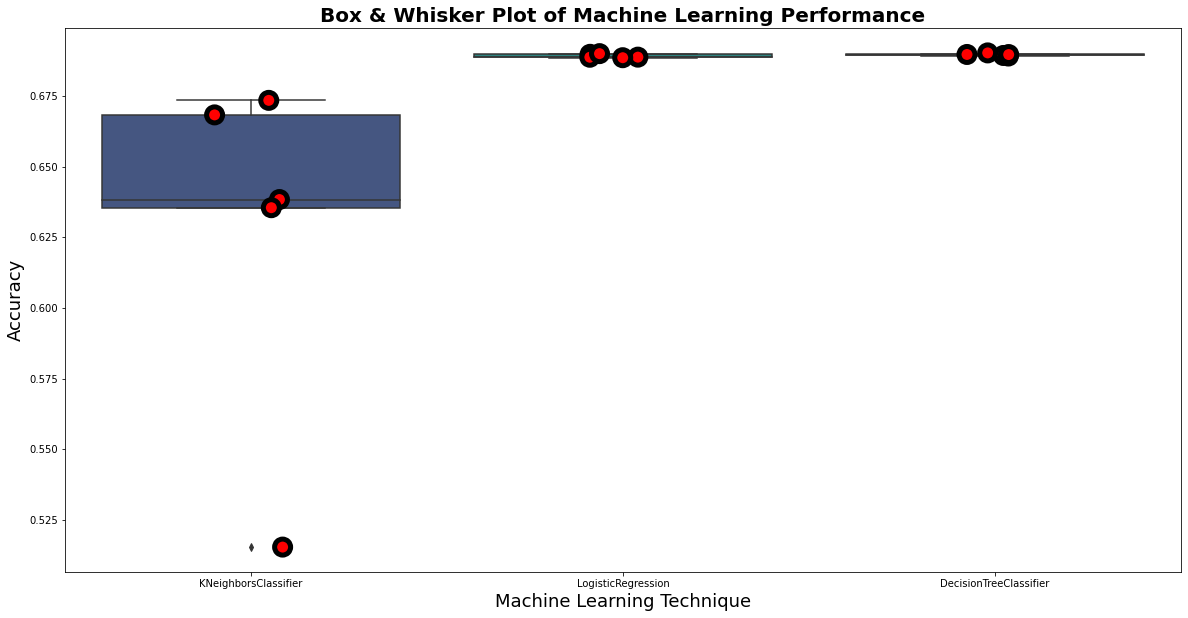

In [83]:

#Box-Whisker Plot of the outputs of the models used above.
f, ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df, palette='viridis')
ax = sns.stripplot(x = 'model_name', y= 'accuracy', data= cv_df, size = 16, jitter = True, color = 'red',
                   edgecolor = 'black', linewidth = 5)
plt.title ('Box & Whisker Plot of Machine Learning Performance', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Machine Learning Technique', fontsize = 18)
ax.set_ylabel('Accuracy', fontsize = 18)
graph_title_for_save = ('box_whisker_plot_ML_perf_')
plt.savefig('Car_Accident_Charts/'+ graph_title_for_save + '.png', dpi = 300, bbox_inches = None)
plt.show()